In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#grpahs
%matplotlib inline

#avoids warnings
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

/home/purna/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:38: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
#loading data into variable
data = pd.read_csv('Scraped Metro Disruptions.csv')

In [3]:
data.head()
#shows top 5 rows

,time,direction,color,location,problem,delay (min),full text
0,"November 16, 2016 5:13 a.m.",Franconia-Springfield,Blue,Capitol South,a signal problem.,8.0,5:13 a.m. A Franconia-Springfield-bound Blue L...
1,"November 16, 2016 6:04 a.m.",Largo Town Center,Blue,King St-Old Town,did not operate,8.0,6:04 a.m. A Largo Town Center-bound Blue Line ...
2,"November 16, 2016 6:46 a.m.",Greenbelt,Green,Columbia Heights,an equipment problem,6.0,6:46 a.m. A Greenbelt-bound Green Line train a...
3,"November 16, 2016 6:46 a.m.",Branch Avenue,Green,U Street,a brake problem,18.0,6:46 a.m. A Branch Avenue-bound Green Line tra...
4,"November 16, 2016 7:00 a.m.",Wiehle-Reston East,Silver,Largo Town Center,did not operate,6.0,7:00 a.m. A Wiehle-Reston East-bound Silver Li...


In [4]:
data =  data.rename(index=str, columns={"delay (min)": "delay"})

In [5]:
data['time'] = pd.to_datetime(data['time'])
#converting object type to datetime type

In [6]:
import datetime as dt

#creating month,date,year,hour columns
data['Month']= data['time'].dt.month
data['date'] = data['time'].dt.date
data['year'] = data['time'].dt.year
data['hour'] = data['time'].dt.hour

In [7]:
data.direction.isna().sum()

1038

In [8]:
data.direction.dropna(axis = 0, inplace =True)

In [9]:
data.direction.isna().sum()

0

In [10]:
data.direction.unique()

array(['Franconia-Springfield', 'Largo Town Center', 'Greenbelt',
       'Branch Avenue', 'Wiehle-Reston East', 'Vienna', 'Shady Grove',
       'NoMa-Gallaudet', 'New Carrollton', 'Huntington',
       'Mt. Vernon Square', 'Glenmont', 'Ft. Totten', 'Fort Totten',
       'Branch Ave', 'Silver Spring', 'Grosvenor', 'West Falls Church',
       'New Carrolton', '1B', '3JI', 'Grosvenor-Strathmore',
       'no-passenger Vienna', 'Ronald Reagan Washington National Airport',
       'Farragut North', 'Stadium-Armory', 'Stadium-Armory ', 'Branch Av',
       'Mt Vernon Sq', 'Wiehle-Reston', 'no-passenger Shady Grove',
       'Medical Center', 'Mt. Vernon Sq', 'Friendship Heights',
       'Van Dorn Street', 'Mt. Vernon', 'Judiciary Square', 'Van Ness',
       'no passenger Largo Town Center', 'Largo', 'Ft Totten',
       'Grosvenor ', 'Branch Ave ', 'Greenbelt Ave',
       'No-Passenger Franconia-Springfield', 'Gallery Place',
       'Metro Center', 'No-Passenger Glenmont',
       'disabled Red Lin

we have duplicate date. clean it.

In [24]:
data['direction'].replace('No-Passenger Franconia-Springfield','Franconia-Springfield',inplace = True)
data['direction'].replace('non-revenue Franconia-Springfield','Franconia-Springfield',inplace = True)
data['direction'].replace('Ft. Totten','Fort Totten',inplace = True)
data['direction'].replace('no-passenger Vienna','Vienna',inplace = True)
data['direction'].replace('Stadium-Armory ','Stadium-Armory',inplace = True)
data['direction'].replace('Branch Av','Branch Avenue',inplace = True)
data['direction'].replace('Mt Vernon Sq','Mt. Vernon Sq',inplace = True)
data['direction'].replace('Mt. Vernon Sq','Mt. Vernon Square',inplace = True)
data['direction'].replace('Mt. Vernon','Mt. Vernon Square',inplace = True)
data['direction'].replace('no passenger Largo Town Center','Largo Town Center',inplace = True)
data['direction'].replace('Largo','Largo Town Center',inplace = True)
data['direction'].replace('Grosvenor ','Grosvenor',inplace = True)
data['direction'].replace('Branch Ave ','Branch Avenue',inplace = True)
data['direction'].replace('no-passenger Shady Grove','Shady Grove',inplace = True)
data['direction'].replace('Greenbelt Ave','Greenbelt',inplace = True)
data['direction'].replace('No-Passenger Glenmont','Glenmont',inplace = True)
data['direction'].replace('Branch_Ave','Branch_Avenue',inplace = True)
data['direction'].replace('New_Carrolton','New_Carollton',inplace = True)
data['direction'].replace('New_Carollton','New_Carrollton',inplace = True)
data['direction'] = data['direction'].str.replace('.',' ')
data['direction'] = data['direction'].str.replace(' ','_')


In [25]:
#data[data['direction'] == 'disabled_Red_Line_train_at_Shady_Grove_platform_delayed_an_arriving_train_for_18_minutes__For_schedule_adherence/improved_train_spacing,_a_Glenmont']
#data[data['direction'] == 'Branch-Ave_Green_Line_train_at_Greenbelt_was_delayed_12_minutes_due_to_a_switch_problem___2:23_p_m__A_New_Carrollton']
#data[data['direction'] == '1B']
#data[data['direction'] == '3JI']

In [26]:
data.drop(data.index[19687],inplace = True)
data.drop(data.index[26694],inplace = True)
data.drop(data.index[968],inplace = True)
data.drop(data.index[1025],inplace = True)

In [27]:
data.direction.unique()

array(['Franconia-Springfield', 'Largo_Town_Center', 'Greenbelt',
       'Branch_Avenue', 'Wiehle-Reston_East', 'Vienna', nan,
       'Shady_Grove', 'NoMa-Gallaudet', 'New_Carrollton', 'Huntington',
       'Mt__Vernon_Square', 'Glenmont', 'Fort_Totten', 'Silver_Spring',
       'Grosvenor', 'West_Falls_Church', '1B', '3JI',
       'Grosvenor-Strathmore',
       'Ronald_Reagan_Washington_National_Airport', 'Farragut_North',
       'Stadium-Armory', 'Wiehle-Reston', 'Medical_Center',
       'Friendship_Heights', 'Van_Dorn_Street', 'Judiciary_Square',
       'Van_Ness', 'Ft_Totten', 'Gallery_Place', 'Metro_Center',
       'Rhode_Island_Avenue', 'Takoma', 'Union_Station', 'Vienna/Fairfax'],
      dtype=object)

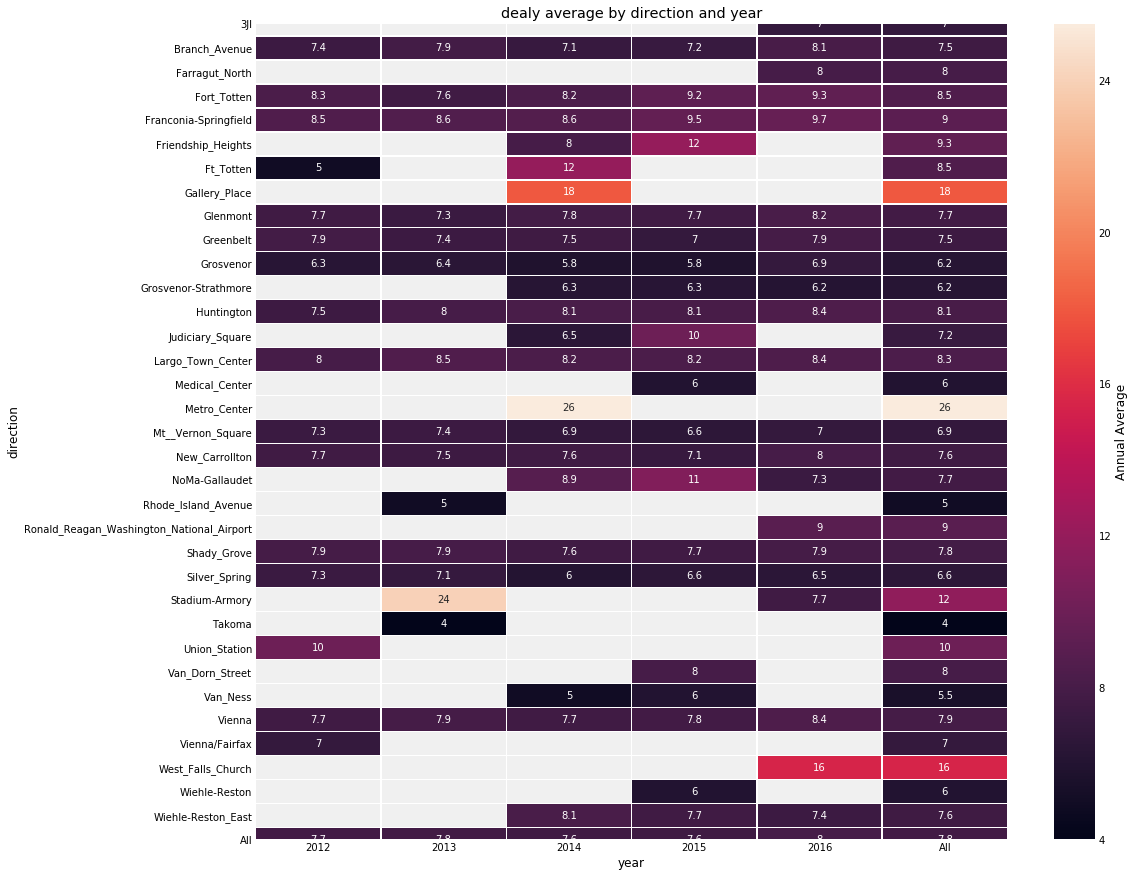

In [28]:
#Heatmap Pivot with State as Row, Year as Col, No2 as Value
f, ax = plt.subplots(figsize=(15,15))
ax.set_title('{} average by direction and year'.format('dealy'))
sns.heatmap(data.pivot_table('delay', index='direction',
                columns=['year'],aggfunc='mean',margins=True),
                annot=True, linewidths=.5, ax=ax,cbar_kws={'label': 'Annual Average'})

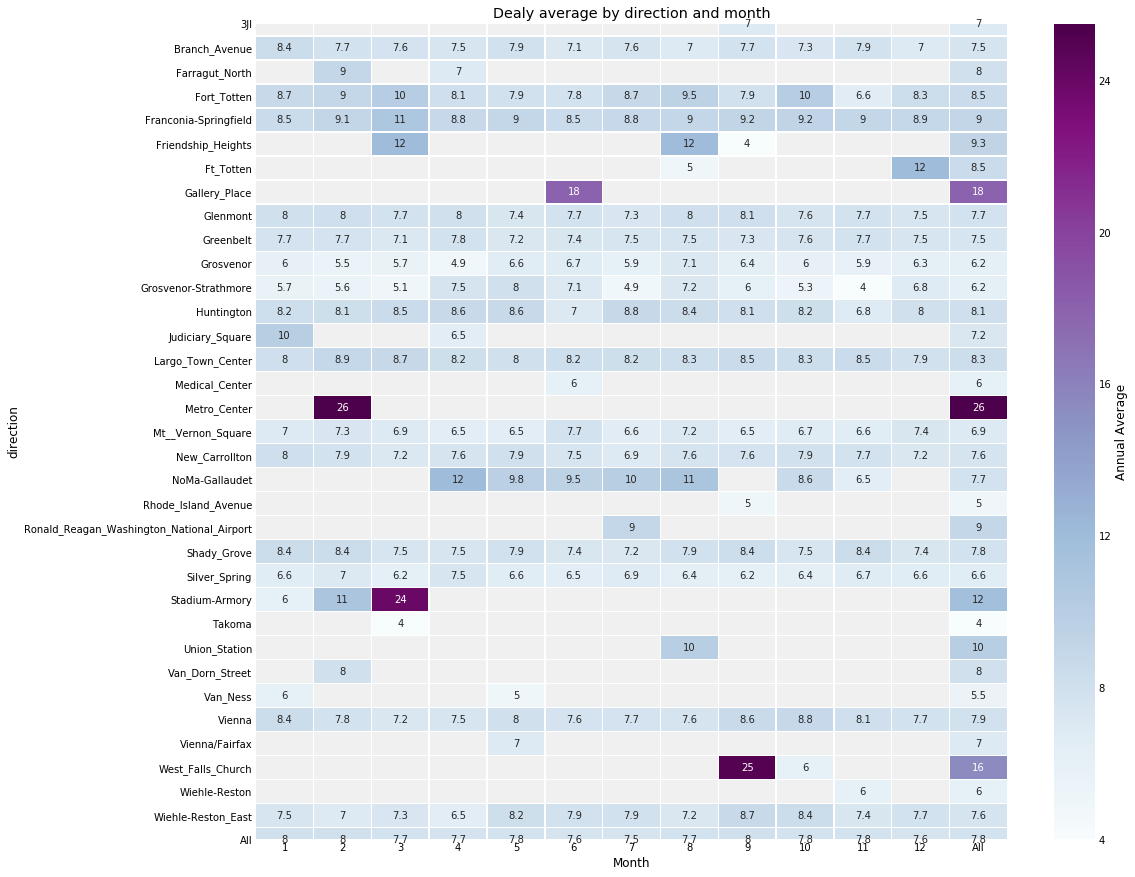

In [30]:
#Heatmap Pivot with State as Row, Year as Col, No2 as Value
f, ax = plt.subplots(figsize=(15,15))
ax.set_title('{} average by direction and month'.format('Dealy'))
sns.heatmap(data.pivot_table('delay', index='direction',
                columns=['Month'],aggfunc='mean',margins=True),
                annot=True,cmap="BuPu", linewidths=.5, ax=ax,cbar_kws={'label': 'Annual Average'})

we are getting only few directions here. so lets take for particular direction.

In [17]:
shadygrove = data[data['direction'] == 'Shady_Grove']

In [18]:
shadygrove

,time,direction,color,location,problem,delay,full text,Month,date,year,hour
8,2016-11-16 08:46:00,Shady_Grove,Red,Medical Center,a brake problem,6.0,8:46 a.m. A Shady Grove-bound Red Line train a...,11,2016-11-16,2016,8
10,2016-11-16 08:58:00,Shady_Grove,Red,Dupont Circle,a medical emergency.,6.0,8:58 a.m. A Shady Grove-bound Red Line train a...,11,2016-11-16,2016,8
16,2016-11-16 11:03:00,Shady_Grove,Red,Metro Center,police activity.,6.0,11:03 a.m. A Shady Grove-bound Red Line train ...,11,2016-11-16,2016,11
19,2016-11-16 15:26:00,Shady_Grove,Red,White Flint,police activity.,5.0,3:26 p.m. A Shady Grove-bound Red Line train a...,11,2016-11-16,2016,15
24,2016-11-16 16:53:00,Shady_Grove,Red,Grosvenor-Strathmore,a brake problem,6.0,4:53 p.m. A Shady Grove-bound Red Line train a...,11,2016-11-16,2016,16
44,2016-11-15 08:39:00,Shady_Grove,Red,Grosvenor-Strathmore,expressed for schedule adherence/improved trai...,NaN,8:39 a.m. A Shady Grove-bound Red Line train a...,11,2016-11-15,2016,8
46,2016-11-15 08:47:00,Shady_Grove,Red,Rockville,expressed for schedule adherence/improved trai...,NaN,8:47 a.m. A Shady Grove-bound Red Line train a...,11,2016-11-15,2016,8
47,2016-11-15 08:58:00,Shady_Grove,Red,Rockville,expressed for schedule adherence/improved trai...,NaN,8:58 a.m. A Shady Grove-bound Red Line train a...,11,2016-11-15,2016,8
59,2016-11-15 17:27:00,Shady_Grove,Red,Medical Center,expressed for schedule adherence/improved trai...,NaN,5:27 p.m. A Shady Grove-bound Red Line train a...,11,2016-11-15,2016,17
60,2016-11-15 17:37:00,Shady_Grove,Red,Twinbrook,expressed for schedule adherence/improved trai...,NaN,5:37 p.m. A Shady Grove-bound Red Line train a...,11,2016-11-15,2016,17


In [19]:
shadygrove.isna().sum()

time           0
direction      0
color          0
location       0
problem        0
delay        487
full text      0
Month          0
date           0
year           0
hour           0
dtype: int64

In [20]:
shadygrove = shadygrove[shadygrove['delay'].isna() == False]

In [21]:
shadygrove.isna().sum()

time         0
direction    0
color        0
location     0
problem      0
delay        0
full text    0
Month        0
date         0
year         0
hour         0
dtype: int64

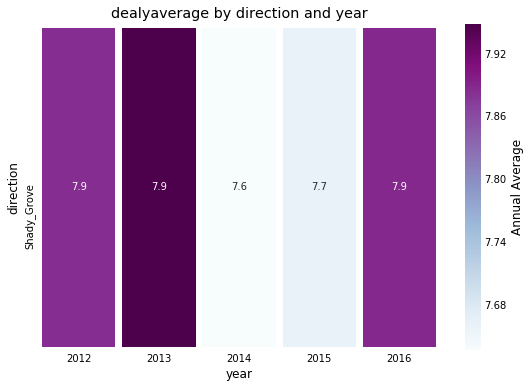

In [22]:
#Heatmap Pivot with State as Row, Year as Col, No2 as Value
f, ax = plt.subplots(figsize=(8,6))
ax.set_title('{}average by direction and year'.format('dealy'))
sns.heatmap(shadygrove.pivot_table('delay', index='direction',
                columns=['year'],aggfunc='mean'),
                annot=True,cmap="BuPu", linewidths=5.9, ax=ax,cbar_kws={'label': 'Annual Average'})

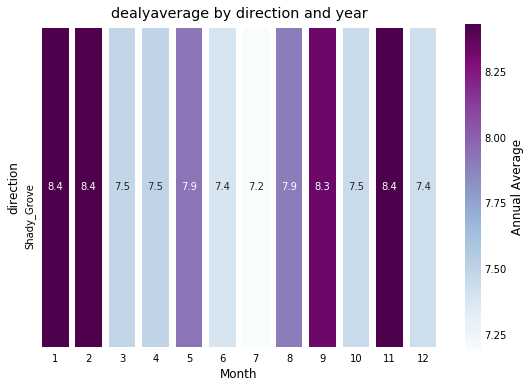

In [23]:
#Heatmap Pivot with State as Row, Year as Col, No2 as Value
f, ax = plt.subplots(figsize=(8,6))
ax.set_title('{}average by direction and year'.format('dealy'))
sns.heatmap(shadygrove.pivot_table('delay', index='direction',
                columns=['Month'],aggfunc='mean'),
                annot=True,cmap="BuPu", linewidths=5.9, ax=ax,cbar_kws={'label': 'Annual Average'})